# Comparing performance of spec2vec in relation with Tanimoto in different percentiles

The following space dimensionalities were used: 2, 50, 100, 300, 500, 600, 650, 700, 750, 800, 100 and 1200.

The diagonal is ignored every time the percentile value is obtained.


In [14]:
import os
import sys

ROOT = os.path.dirname(os.getcwd())
sys.path.insert(0, ROOT)

In [15]:
from custom_functions.spectra_functions import get_data_folder_path

path = get_data_folder_path()

## Retrieving Tanimoto similarity scores

In [13]:
import numpy as np 

filename = os.path.join(path, "gcms_similarities_filter05_morgan3_2048_dice.npy")
matrix_similarities_tanimoto = np.load(filename)

## Method to obtain the average similarity score of certain percentile

In [16]:
import re
import unidecode
import numpy as np
from matplotlib import pyplot as plt

def plot_precentile(arr_ref, arr_sim, percentile_rn, ignore_diagonal=False):
    ## Code inspired by Florian Huber's jupyter notebook to compute top percentile average similarity score
    ## https://github.com/iomega/spec2vec_gnps_data_analysis/blob/master/custom_functions/plotting_functions.py
    
    # function to search and obtain nan elemnts and delete them
    # First checks if the arrays has the same length
    # Then obtaines the indexes of the elements that are not nan of the reference array
    # Then overwrites both arrays without the position on which were nans in the reference array
    def _ignore_reference_nans(arr_ref, arr_sim):
        assert arr_ref.shape == arr_sim.shape, "Expected two arrays of identical shape."
        idx_not_nans = np.where(np.isnan(arr_ref) == False)
        arr_sim = arr_sim[idx_not_nans]
        arr_ref = arr_ref[idx_not_nans]
        return arr_ref, arr_sim

    # If true replace the elements in the diagonal with NaN
    if ignore_diagonal:
        np.fill_diagonal(arr_ref, np.nan)

    # Call to this method to remove the NaN elements from the arrays
    arr_ref, arr_sim = _ignore_reference_nans(arr_ref, arr_sim)

    # Obtain the index position according to the percentile
    start = int(arr_sim.shape[0] * percentile_rn / 100)
    idx = np.argpartition(arr_sim, -start)
    starting_point = arr_sim[idx[-start]]
    if starting_point == 0:
        print("not enough datapoints != 0 above given top-precentile")

    # Obtain only the elements on the given percentile
    low_as = np.where(arr_sim < starting_point)[0]

    # Set the length of the array to the length of the new list with the percentile elements
    length_selected = arr_sim.shape[0] - low_as.shape[0]  # start+1

    # Create a new array of zeros where the elements of array_ref and array_sim will be added
    data = np.zeros((2, length_selected))
    # Add arr_sim values to first position and arr_ref to second position
#     data[0, :] = arr_sim[low_as]
#     data[1, :] = arr_ref[low_as]
    data[0, :] = np.delete(arr_sim, low_as)
    data[1, :] = np.delete(arr_ref, low_as)

    # Order the data according to arr_sim scores
    data = data[:, np.lexsort((data[1, :], data[0, :]))]

    # Return mean molecular similarity score of arr_ref 
    # return np.mean(data[1, :])
    return np.mean(data[1])

## Scattered plot of spec2vec performance with different space dimensions

In [17]:
import matplotlib.pyplot as plt

def plot_spec2vec_performance(spec2vec_percentile_scores, dimensions, percentile):
    plt.style.use('ggplot')
    fig, ax = plt.subplots(figsize=(12,9))

    max_dimensions = max(dimensions) + 20
    max_score = max(spec2vec_percentile_scores)
    min_score = min(spec2vec_percentile_scores)
    
    title = 'Performance of spec2vec {0:g}th Percentile'.format(float(percentile*100))

    plt.scatter(dimensions, spec2vec_percentile_scores)

    plt.suptitle(title, fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()
    plt.xlabel("Spectral dimensionality", fontsize=13)
    plt.ylabel("Mean molecular similarity f(m1,m2) \n (within 30th percentile)", fontsize=13)
    plt.show()

## Obtaining the average scores for the 1st percentile

Once obtaining the average molecular similarity for the 1st percentile these are store in a file

In [5]:
x_dimensions = [2, 50, 100, 300, 500, 600, 650, 700, 750, 800, 1000, 1200]
percentile = 0.01
ten_iterations = []
count = 0

for idx in range(10):
    percentile_cosine_spec2vec2_list = []
    for dimension in x_dimensions:
        matrix_filename = "similarities_filter05_spec2vec_it{:d}_size{:d}.npy".format(idx+1, dimension)
        filename = os.path.join(path, matrix_filename)
        similarity_matrix_spec2vec = np.load(filename)
        percentile_cosine_spec2vec2_list.append(plot_precentile(matrix_similarities_tanimoto, similarity_matrix_spec2vec, percentile, ignore_diagonal=True))
        count += 1
        progress = (count / (10 * len(x_dimensions))) * 100
        print('\r', 'About {:.3f}% completed'.format(progress), end="")
    ten_iterations.append(percentile_cosine_spec2vec2_list)

filename = os.path.join(path,'avg_mol_sim_spec2vec_10iterarions_percentile1.npy')
np.save(filename, ten_iterations)


 About 100.000% completed

## Plotting spec2vec performance in 10 iterations to observe its behaviour

No handles with labels found to put in legend.


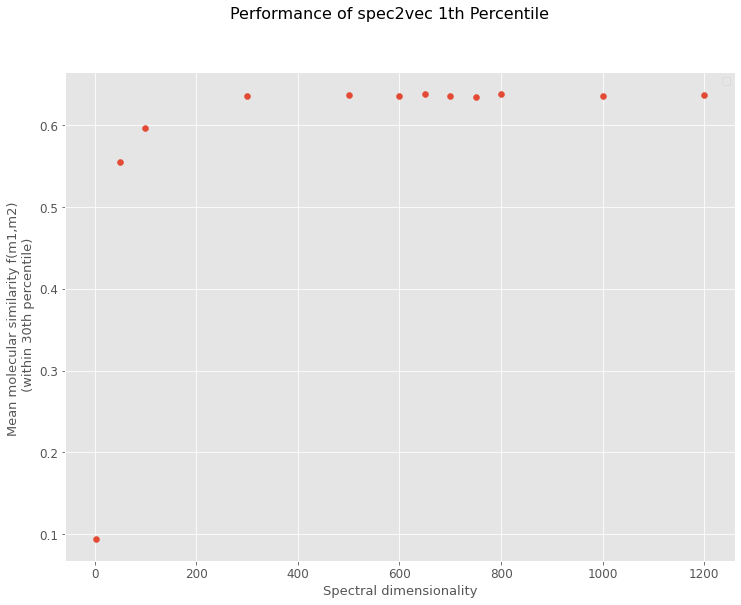

No handles with labels found to put in legend.


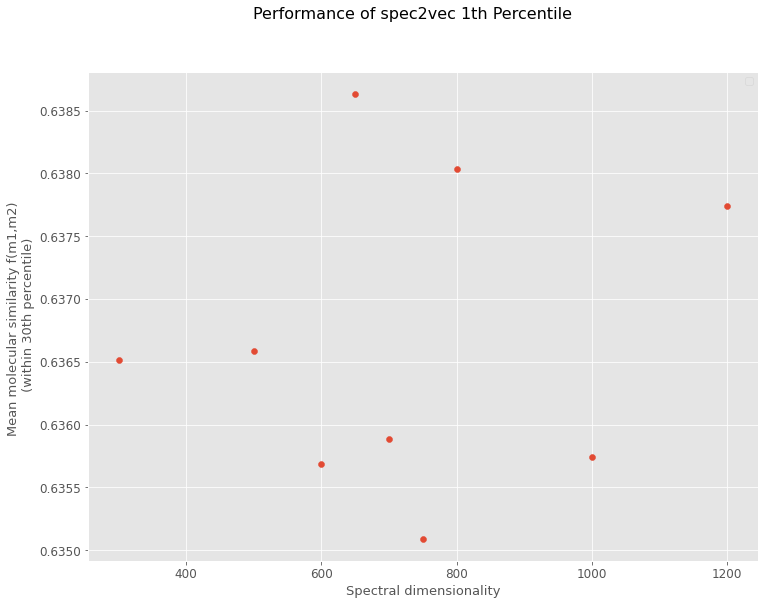

No handles with labels found to put in legend.


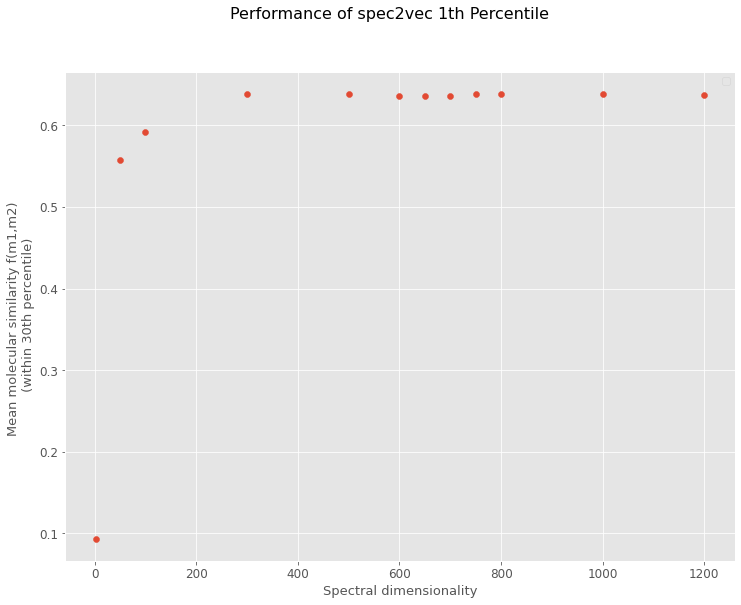

No handles with labels found to put in legend.


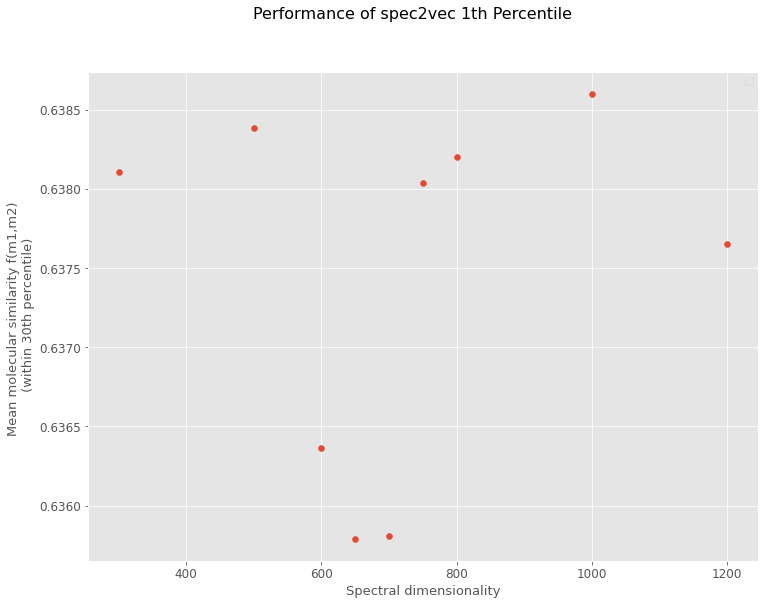

No handles with labels found to put in legend.


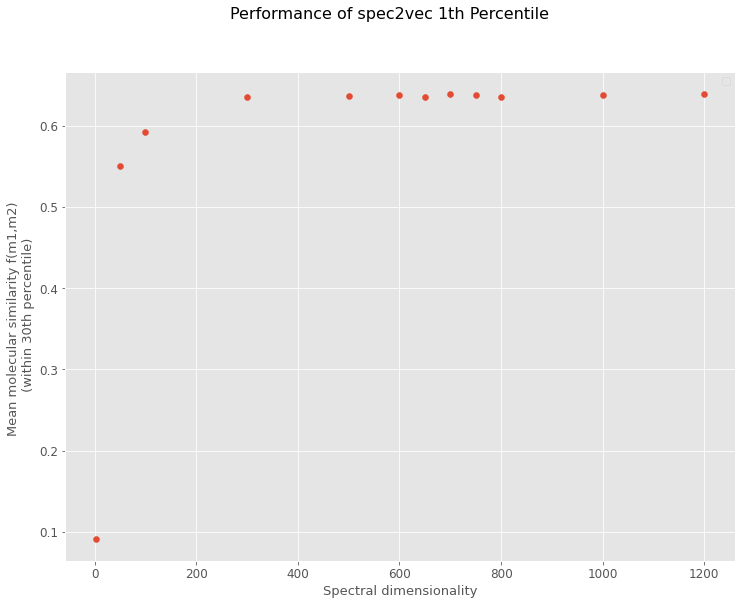

No handles with labels found to put in legend.


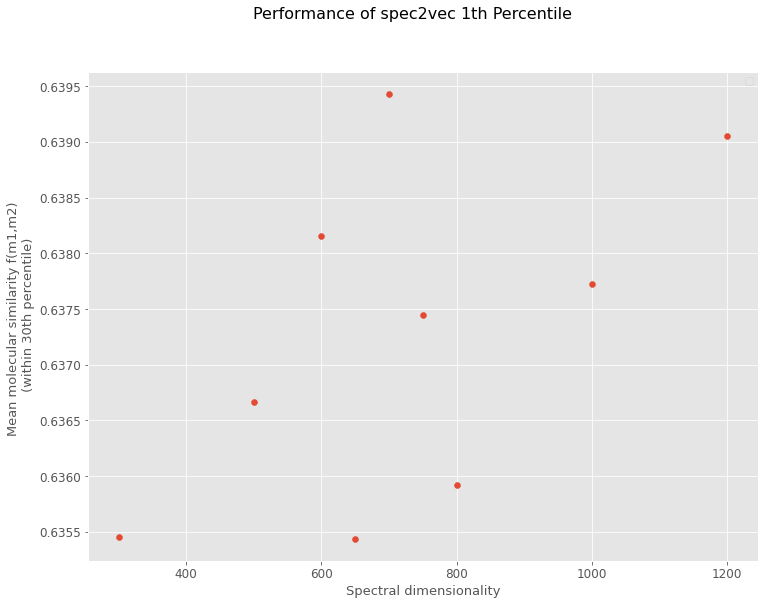

No handles with labels found to put in legend.


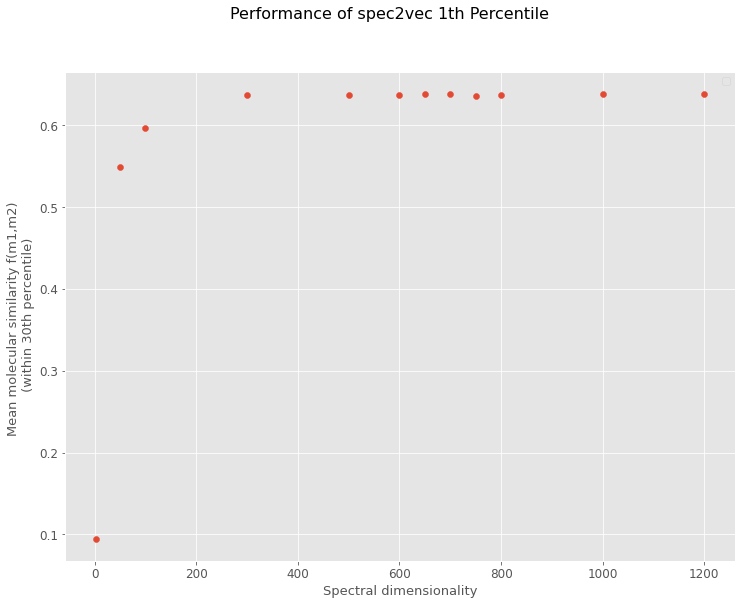

No handles with labels found to put in legend.


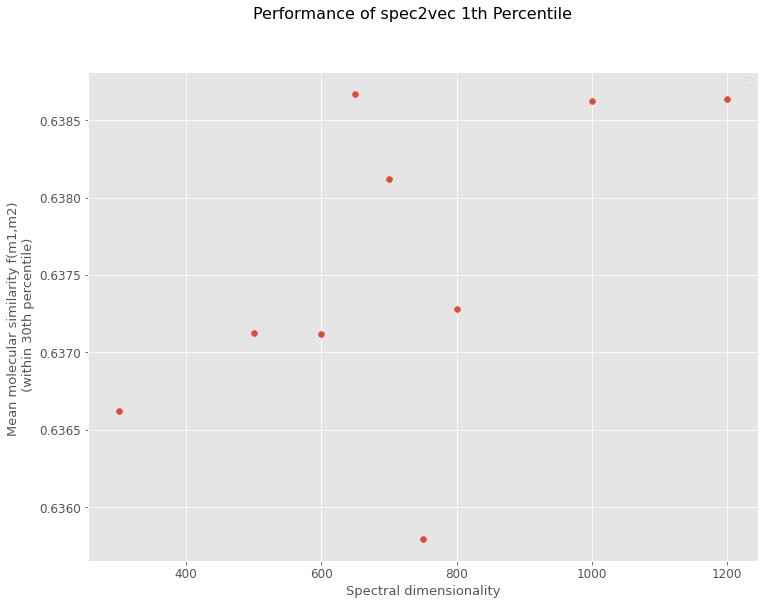

No handles with labels found to put in legend.


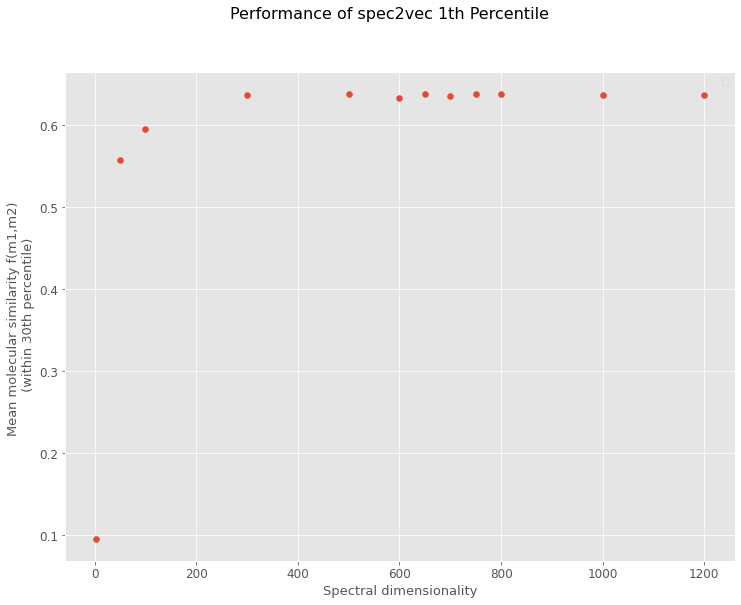

No handles with labels found to put in legend.


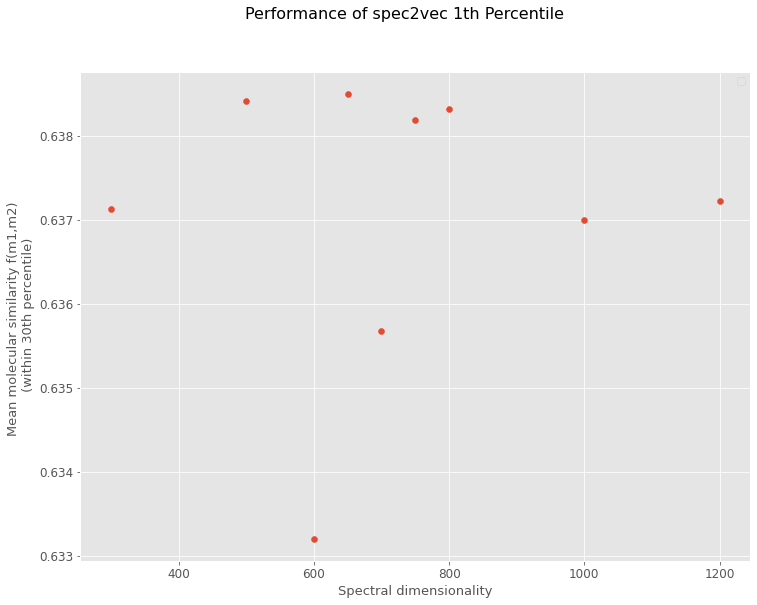

No handles with labels found to put in legend.


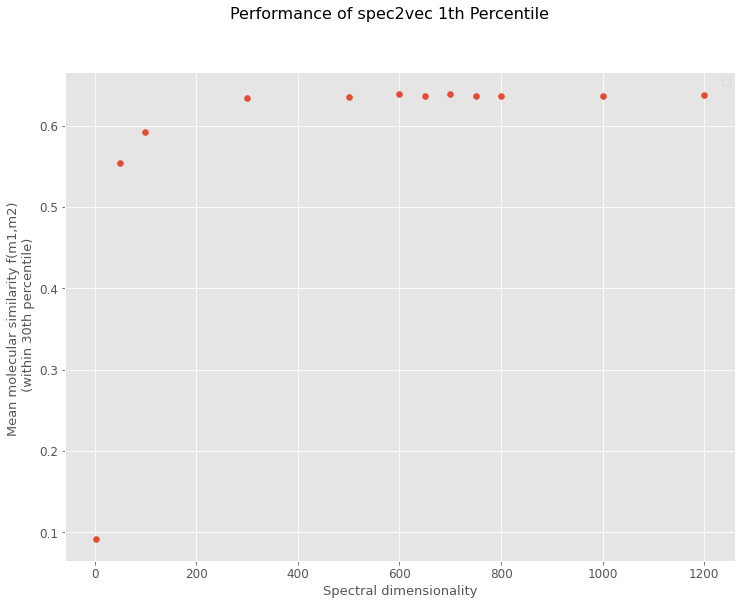

No handles with labels found to put in legend.


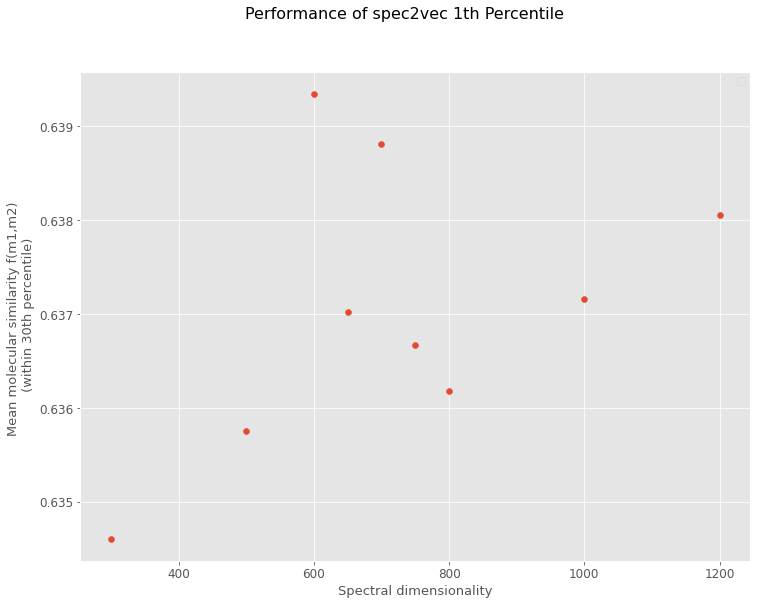

No handles with labels found to put in legend.


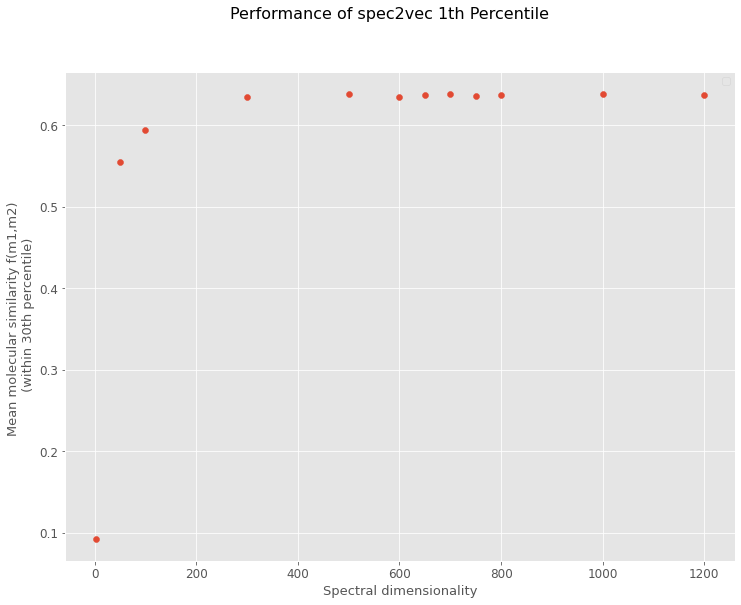

No handles with labels found to put in legend.


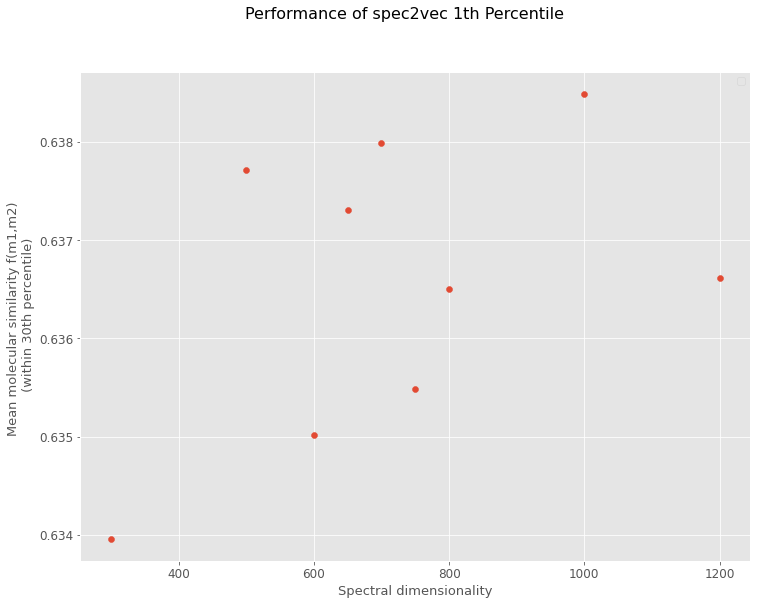

No handles with labels found to put in legend.


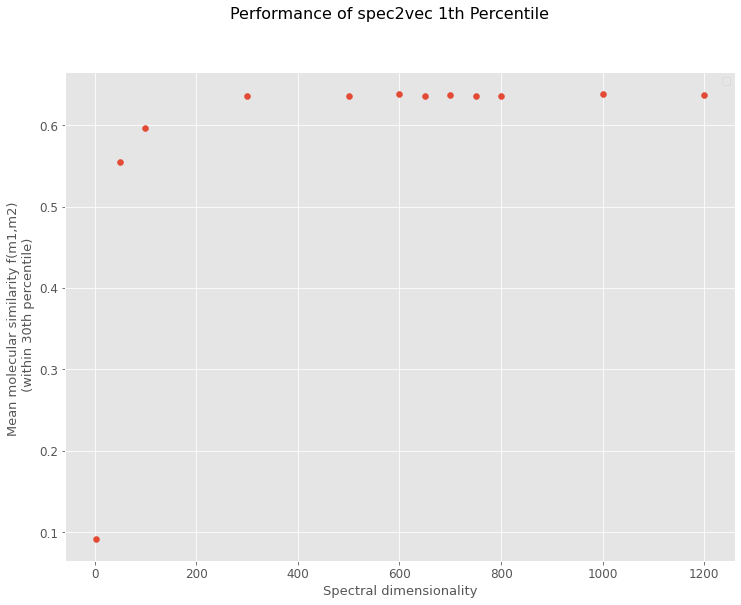

No handles with labels found to put in legend.


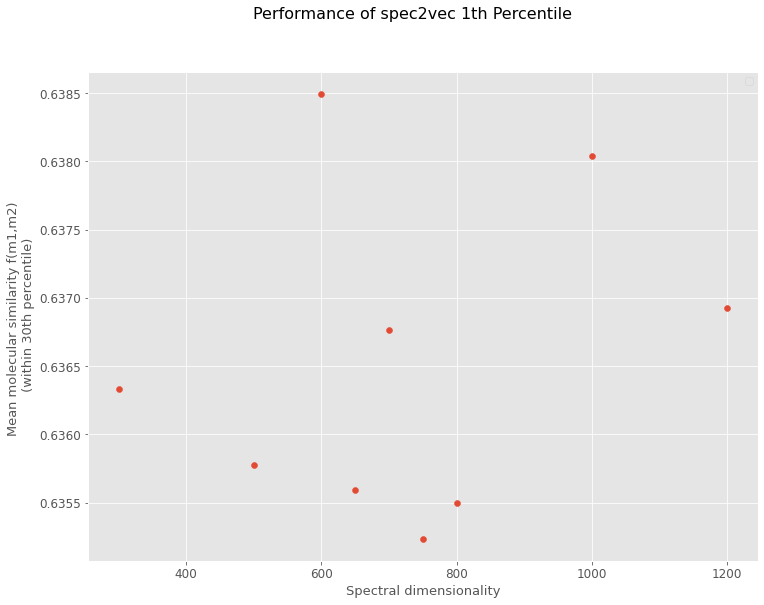

No handles with labels found to put in legend.


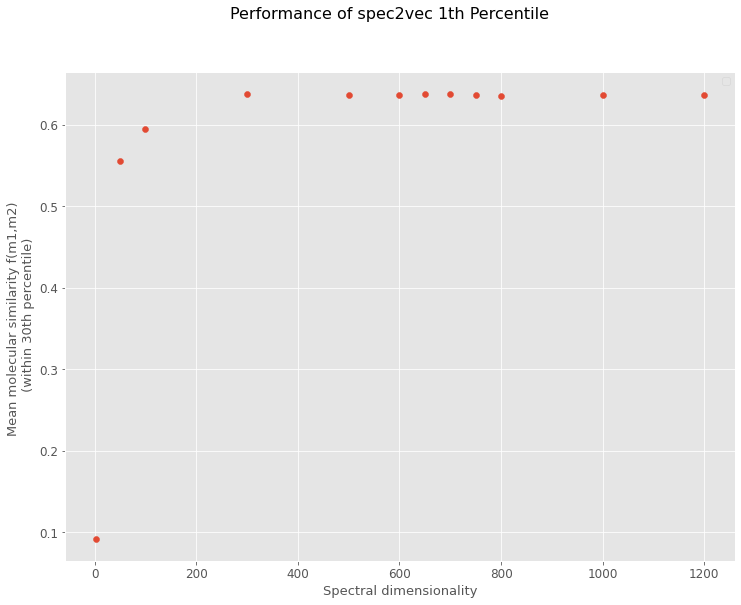

No handles with labels found to put in legend.


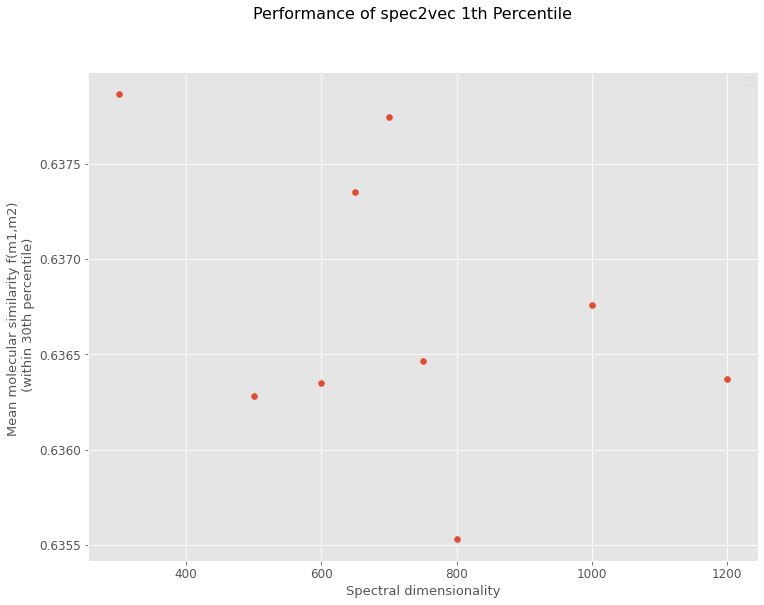

No handles with labels found to put in legend.


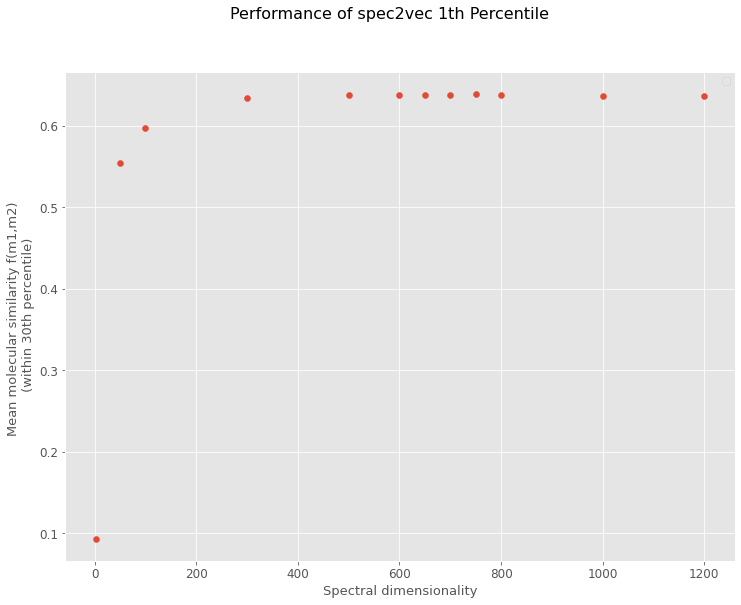

No handles with labels found to put in legend.


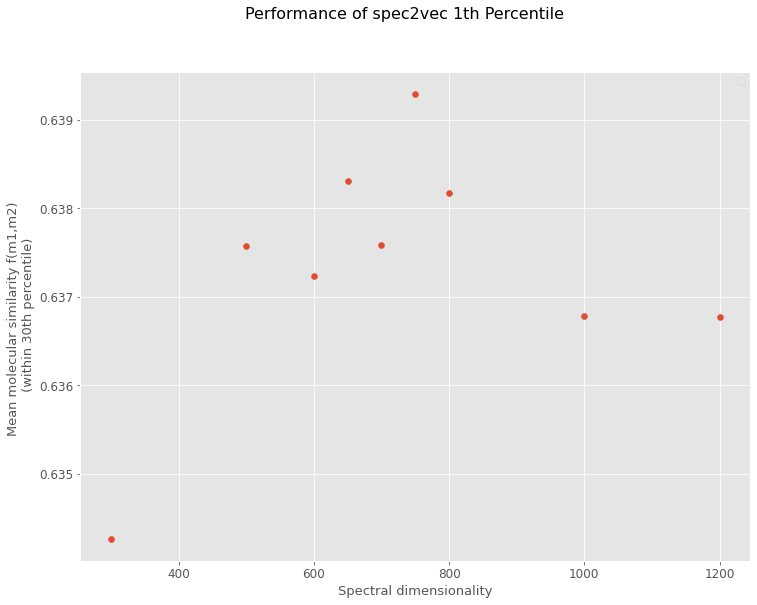

In [20]:
for spec2vec_avg_mol_scores in ten_iterations:
    plot_spec2vec_performance(spec2vec_avg_mol_scores, x_dimensions, percentile)
    plot_spec2vec_performance(spec2vec_avg_mol_scores[3:], x_dimensions[3:], percentile)
    print("=========================================")